<a href="https://colab.research.google.com/github/yrevanth/MLProject_Text/blob/master/GoodFitnessProject_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Understanding the Structure of the Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/UTA_ML/CardioGoodFitness.csv')

In [4]:
#Performing cursory overview of the dataset shape, info and data types 
df.shape

(180, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
#Dataset does not seem to have any NULL variables, no need for missing value treatments
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [ ]:
#Age Variable seems equitably distributed with Mean and median relatively close to each other
#Every person on the dataset seems to have at least a high school diploma, with the median and mean indicating college level education as well, max seems to be 21 years, indicating PhD or masters level 
#Usage average and median are relatively close to each other
#Fitness semms to be relatively close as well, with a slight right skew
#Income is Right skewed as well slightly
# Miles is right skewed, with median below mean
#All data points have their mean and median <1 standard deviation away from each other, indicating relatively normal fits

In [7]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


#Univariate Data Analysis

In [8]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="mediumturquoise")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="mediumpurple")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="mediumpurple")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


## Looking into the Categorical Data points and their distributions to check for outliers etc

In [11]:
#Product Gender and Marital Status are the only categorical variables, while everything else is numerical, an argument can be made 
#that Usage is categorical as well
df['Product'].value_counts()
#There is data for 3 product lines, with TM195 being the most sold product

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [12]:
df['Gender'].value_counts()
#Mostly males purchase the products from GoodFitness indicating some bias

Male      104
Female     76
Name: Gender, dtype: int64

In [13]:
df['MaritalStatus'].value_counts()
#Most customers seem to be married or partnered

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [14]:
df['Education'].value_counts()
#Most customers have a college/associates degree

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [24]:
df['EDUCATION_bins'] = pd.cut(df.Education, bins=[11,14,16,18,21],labels=['Upto HS', 'In or has Undergrad',"Grad","Post Grad"])
#cut_series, cut_intervals = pd.cut(df.Education,
#                                  bins=3,
#                                   retbins=True)
#print(cut_series)
df['EDUCATION_bins'].value_counts()

In or has Undergrad    90
Upto HS                63
Grad                   23
Post Grad               4
Name: EDUCATION_bins, dtype: int64

In [25]:
df['Usage'].value_counts(normalize=True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

## Looking into Numerical Datapoints and their distributions

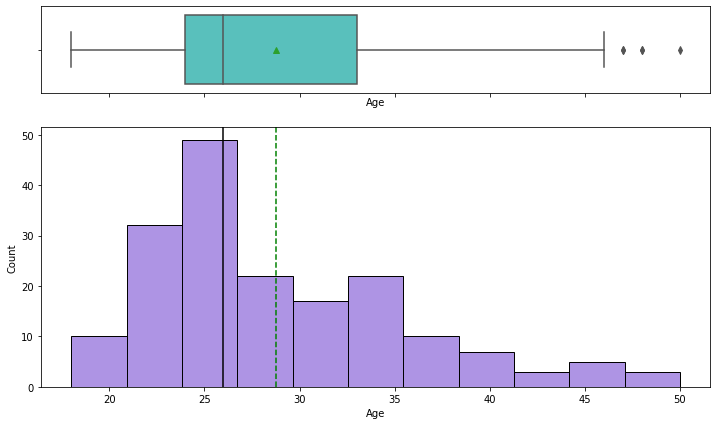

In [26]:
histogram_boxplot(df,'Age')

Mean Age for customers is higher than median, and the graph shows a right skew

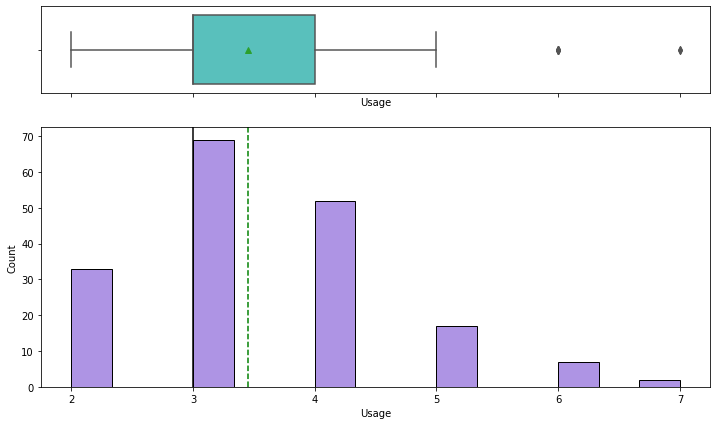

In [27]:
histogram_boxplot(df,'Usage')

A lot of people indicate working out for 3 days of the week. Number of people using the equipment >4 days of the week is ~14% of the population

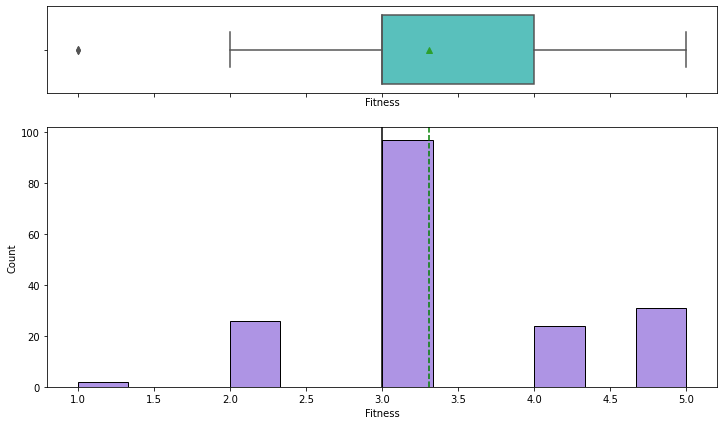

In [28]:
histogram_boxplot(df,'Fitness')

In [29]:
df['Fitness'].value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

A majority of customers rate themselves as moderately fit (3) with a very low number (~1%) rating themselves as unfit

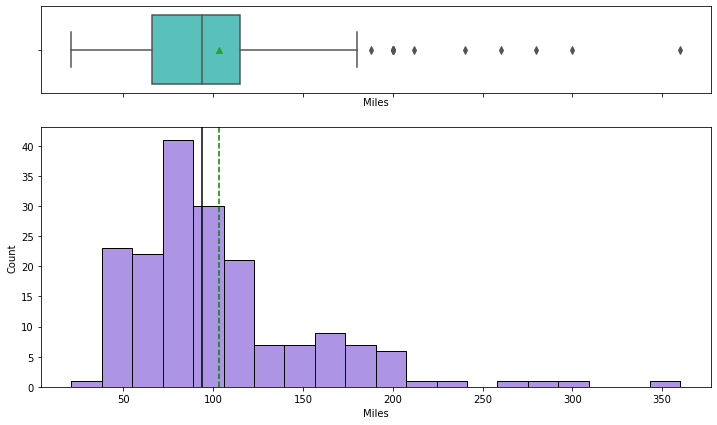

In [30]:
histogram_boxplot(df,'Miles')

In [31]:
df['Miles'].value_counts(sort='descending')

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

THere seem to be a few outliers where people indicate that they will run>200 miles (about 3%) 

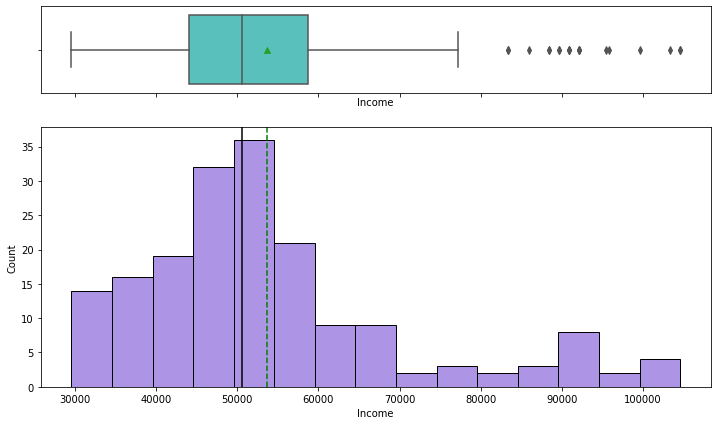

In [32]:
histogram_boxplot(df,'Income')

In [33]:
df[df['Income']>=80000]['Income'].count()

19

~10% of people make >80000 in salary

#Bivariate Deep Dives into the data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    object  
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    object  
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    object  
 5   Usage           180 non-null    int64   
 6   Fitness         180 non-null    int64   
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   EDUCATION_bins  180 non-null    category
dtypes: category(1), int64(6), object(3)
memory usage: 13.2+ KB


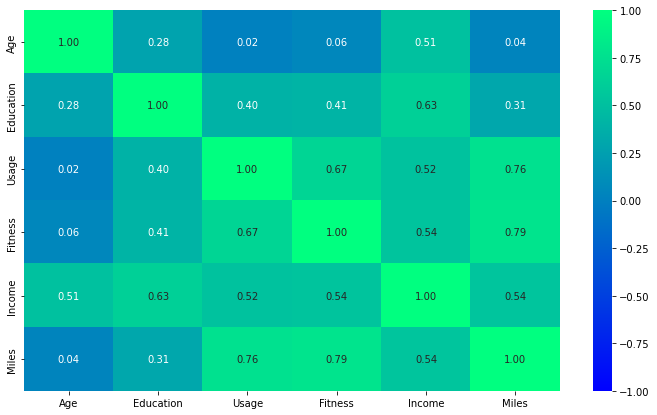

In [35]:
#Checking for correlations between numerical variables
num_vars=['Age','Education','Usage','Fitness','Income','Miles']

corr=df[num_vars].corr()

plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='winter')

There is a large correlation as expected between Miles, Usage and Fitness
There is a large correlation between income and education as expected
Moderate correlations exist between all variables and income

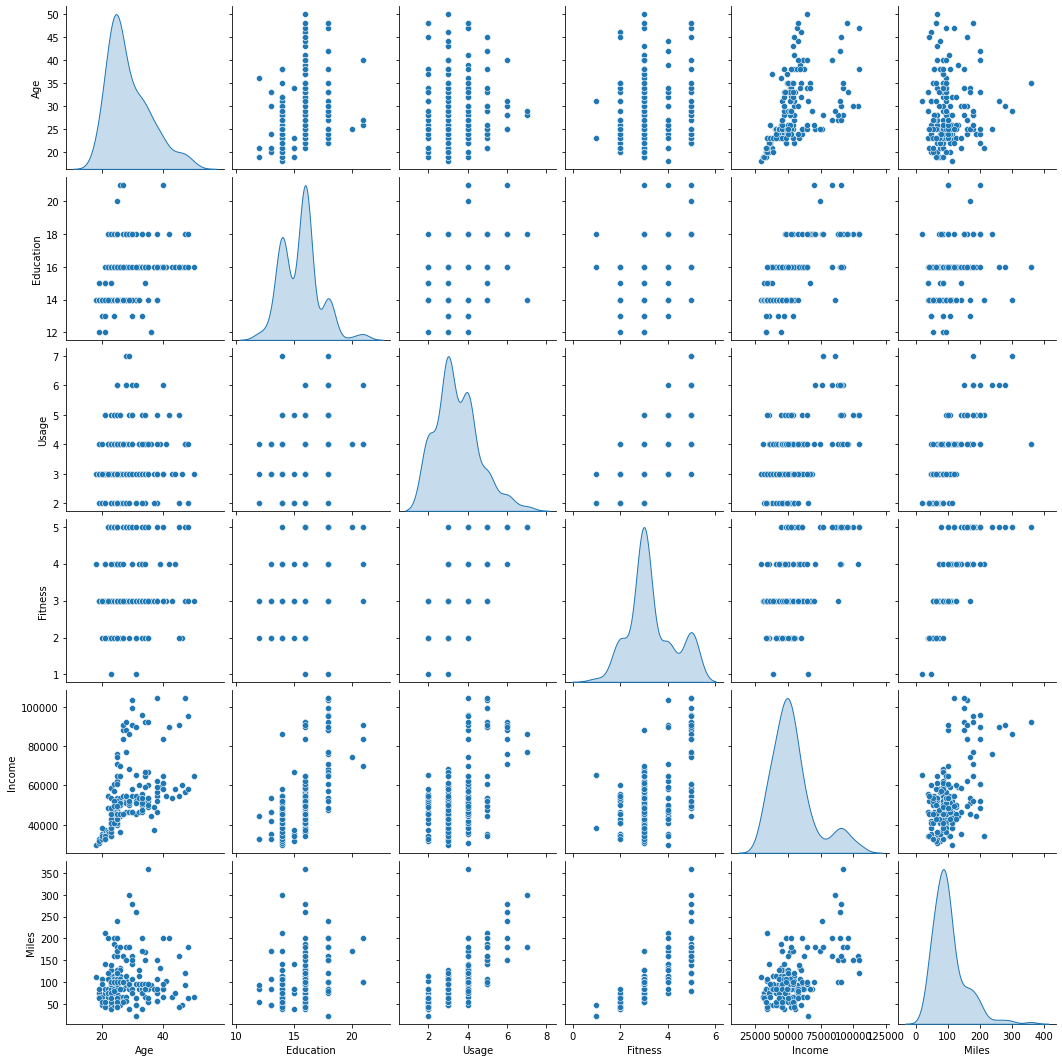

In [36]:
sns.pairplot(data=df[num_vars],diag_kind='kde')

MOst variables above, exept Income, Age and Miles can be viewed as categorical variables, but for the purposes of this analysis, i am considering them to be numerical

#Multivariate Analysis

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Product         180 non-null    object  
 1   Age             180 non-null    int64   
 2   Gender          180 non-null    object  
 3   Education       180 non-null    int64   
 4   MaritalStatus   180 non-null    object  
 5   Usage           180 non-null    int64   
 6   Fitness         180 non-null    int64   
 7   Income          180 non-null    int64   
 8   Miles           180 non-null    int64   
 9   EDUCATION_bins  180 non-null    category
dtypes: category(1), int64(6), object(3)
memory usage: 13.2+ KB


In [38]:
df.groupby(by=['Product','Gender']).count()

Age  Education  MaritalStatus  Usage  Fitness  Income  Miles  \
Product Gender                                                                 
TM195   Female   40         40             40     40       40      40     40   
        Male     40         40             40     40       40      40     40   
TM498   Female   29         29             29     29       29      29     29   
        Male     31         31             31     31       31      31     31   
TM798   Female    7          7              7      7        7       7      7   
        Male     33         33             33     33       33      33     33   

                EDUCATION_bins  
Product Gender                  
TM195   Female              40  
        Male                40  
TM498   Female              29  
        Male                31  
TM798   Female               7  
        Male                33

In [39]:
df.groupby(by=['Product','Gender'])['Miles'].mean()

Product  Gender
TM195    Female     76.200000
         Male       89.375000
TM498    Female     87.344828
         Male       88.483871
TM798    Female    180.000000
         Male      164.121212
Name: Miles, dtype: float64

TM798 is the only product where we either do not have enough data about Women purchasing the product OR men predominantly purchase this product. There seems to be a signficant difference in usage between men/women in the TM195 and TM798 products (TM798 has data only for 7 women)

In [40]:
df.groupby(by=['Product','Gender'])['Income'].mean()

Product  Gender
TM195    Female    46020.075000
         Male      46815.975000
TM498    Female    49336.448276
         Male      48634.258065
TM798    Female    73633.857143
         Male      75825.030303
Name: Income, dtype: float64

Data shows that the Product TM798 is purchased by people with higher average incomes, maybe due to price of the product, while TM195 seems to be the most affordable product

In [41]:
df.groupby(by=['Product'])['Miles'].mean()

Product
TM195     82.787500
TM498     87.933333
TM798    166.900000
Name: Miles, dtype: float64

TM798 product seems to be preferred by customers who indicate a very high usage

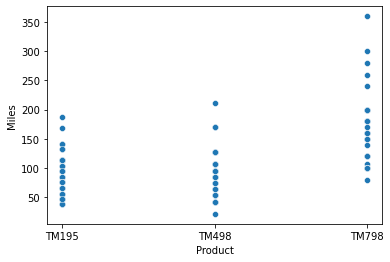

In [42]:
sns.scatterplot(data=df,x='Product',y='Miles')

In [43]:
df[df['Miles']>250]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,EDUCATION_bins
166,TM798,29,Male,14,Partnered,7,5,85906,300,Upto HS
167,TM798,30,Female,16,Partnered,6,5,90886,280,In or has Undergrad
170,TM798,31,Male,16,Partnered,6,5,89641,260,In or has Undergrad
173,TM798,35,Male,16,Partnered,4,5,92131,360,In or has Undergrad


Some of the numbers above seem excessive, but depending on the timeperiod of usage, this may make sense. The custoemr who indicates that he will use the product only 4 days a week has the highest number of miles which seems to be a little odd.

In [44]:
df.groupby(by=['Product'])['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

There seems to be no significant variation in product by age

In [45]:
df.groupby(by=['Product','Fitness'])['Miles'].mean()

Product  Fitness
TM195    1           47.000000
         2           49.142857
         3           82.574074
         4          119.111111
         5          178.500000
TM498    1           21.000000
         2           54.666667
         3           92.102564
         4          125.875000
TM798    3          101.500000
         4          154.285714
         5          178.965517
Name: Miles, dtype: float64

In [46]:
df.groupby(by=['Product','Fitness'])['Miles'].count()

Product  Fitness
TM195    1           1
         2          14
         3          54
         4           9
         5           2
TM498    1           1
         2          12
         3          39
         4           8
TM798    3           4
         4           7
         5          29
Name: Miles, dtype: int64

Most customers with a Self rated value of 3 or below would prefer the TM195 or TM498 products. While customers who rate themselves to be extremely fit prefer TM798. Most customers who rate themselves 4 or above have a usage of atleast 120 on average

In [47]:
df.groupby(['Product'])['Usage'].mean()

Product
TM195    3.087500
TM498    3.066667
TM798    4.775000
Name: Usage, dtype: float64

Customers mentioning that they want to use the product for 4 or more days per week may prefer the TM798

In [56]:
df.groupby(['EDUCATION_bins','Product']).count()

Age  Gender  Education  MaritalStatus  Usage  \
EDUCATION_bins      Product                                                 
Upto HS             TM195     35      35         35             35     35   
                    TM498     26      26         26             26     26   
                    TM798      2       2          2              2      2   
In or has Undergrad TM195     43      43         43             43     43   
                    TM498     32      32         32             32     32   
                    TM798     15      15         15             15     15   
Grad                TM195      2       2          2              2      2   
                    TM498      2       2          2              2      2   
                    TM798     19      19         19             19     19   
Post Grad           TM195      0       0          0              0      0   
                    TM498      0       0          0              0      0   
                    TM798      4       4          4              4      4   

                             Fitness  Income  Miles  
EDUCATION_bins      Product                          
Upto HS             TM195         35      35     35  
                    TM498         26      26     26  
                    TM798          2       2      2  
In or has Undergrad TM195         43      43     43  
                    TM498         32      32     32  
                    TM798         15      15     15  
Grad                TM195          2       2      2  
                    TM498          2       2      2  
                    TM798         19      19     19  
Post Grad           TM195          0       0      0  
                    TM498          0       0      0  
                    TM798          4       4      4

In [59]:
df.groupby(['EDUCATION_bins','Product']).mean()

Age  Education     Usage   Fitness  \
EDUCATION_bins      Product                                             
Upto HS             TM195    26.200000  13.800000  2.885714  2.885714   
                    TM498    24.884615  13.846154  3.153846  2.961538   
                    TM798    25.500000  14.000000  5.500000  4.000000   
In or has Undergrad TM195    30.302326  15.906977  3.255814  3.023256   
                    TM498    31.968750  15.968750  3.031250  2.875000   
                    TM798    27.866667  16.000000  4.533333  4.866667   
Grad                TM195    32.000000  18.000000  3.000000  3.000000   
                    TM498    32.000000  18.000000  2.500000  2.500000   
                    TM798    30.368421  18.000000  4.947368  4.578947   
Post Grad           TM195          NaN        NaN       NaN       NaN   
                    TM498          NaN        NaN       NaN       NaN   
                    TM798    29.500000  20.750000  4.500000  4.250000   

                                   Income       Miles  
EDUCATION_bins      Product                            
Upto HS             TM195    43595.828571   78.971429  
                    TM498    43293.461538   95.384615  
                    TM798    67282.000000  203.000000  
In or has Undergrad TM195    47727.558140   85.790698  
                    TM498    53119.218750   84.406250  
                    TM798    69389.000000  176.666667  
Grad                TM195    67651.500000   85.000000  
                    TM498    56487.000000   47.500000  
                    TM798    80186.315789  160.526316  
Post Grad           TM195             NaN         NaN  
                    TM498             NaN         NaN  
                    TM798    79681.000000  142.500000

In [52]:
df[df['EDUCATION_bins']=='Post Grad']

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,EDUCATION_bins
156,TM798,25,Male,20,Partnered,4,5,74701,170,Post Grad
157,TM798,26,Female,21,Single,4,3,69721,100,Post Grad
161,TM798,27,Male,21,Partnered,4,4,90886,100,Post Grad
175,TM798,40,Male,21,Single,6,5,83416,200,Post Grad


#Insights from the analysis above
1) Most of the data provided is for the TM195 product, which means this is the most popular product, next is the TM498 with 60 customers and next is the TM798 with only 40 customers. This may also indicate the price levels of these 3 products 


2) Customers who are very fit or indicate they will use the product for a lot of miles tend to pick the TM798


3) Income and Education level seem to be correlated


4) Similarly Usage,miles and fitness seem to be strongly correlated

5) We do not have much data for females in the TM798 product, even though per our observation these customers are fairly similar in terms of fitness levels and income as their male counter parts. we can enhance the analysis by obtaining more data about females in the TM 798 product. In this current data, it looks like Females prefer the first 2 products

6)Customers preferring the TM798 product typically indicate that they want to work out for more than 4 days on average

7) Customers with lower incomes prefer the TM195 product

8) almost all customers with 18 or more years of education purchase the TM798, which can be targeted to highly educated individuals



In [60]:
%%shell

jupyter nbconvert --to html

/content/GoodFitnessProject.ipynb

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

CalledProcessError: ignored

In [4]:

df['Age_Groups'] = pd.cut(df.Age, bins=4)
df.head()

NameError: ignored